# Ensemble Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [6]:
bc = pd.read_csv("./data/wbc.csv")
bc.drop('Unnamed: 32', axis=1, inplace=True)
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
# X = bc.drop('diagnosis', axis=1).values
X = bc.loc[:, ['radius_mean', 'concave points_mean']].values
y = bc.diagnosis.values
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (569, 2)
y shape: (569,)


In [15]:
seed = 57
splits = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train, X_test, y_train, y_test = splits
print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}")

X_train shape: (398, 2)
y_train shape: (398,)
X_test shape: (171, 2)
y_test shape: (171,)


In [16]:
# classifiers
lr = LogisticRegression(random_state=seed)
knn = KNN()
dt = DecisionTreeClassifier(random_state=seed)

# define a list called classifier: tuples(classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbors', knn),
               ('Classification Tree', dt)]

# iterate over the classifiers
for clf_name, clf in classifiers:
    # fit clf to the training set
    clf.fit(X_train, y_train)
    
    # predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    # evaluate the accuracy of clf on test set
    acc = accuracy_score(y_test, y_pred)
    print(f"{clf_name}: {acc:.3f}")

Logistic Regression: 0.836
K Nearest Neighbors: 0.807
Classification Tree: 0.877


In [17]:
# instantiate a voting classifier 'vc'
vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Voting Classifier: {acc:0.3f}")

Voting Classifier: 0.842


## Bagging

In [18]:
from sklearn.ensemble import BaggingClassifier

In [19]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=seed)
b_clf = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

b_clf.fit(X_train, y_train)
y_pred = b_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier: {acc:0.3f}")

Accuracy of Bagging Classifier: 0.906


## Out of Bag(OOB) Evaluation
* On average, for each model, 63% of the training instances are sampled.
* the remaining 37% constitute the OOB instances.

In [20]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=seed)
b_clf_oob = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

b_clf_oob.fit(X_train, y_train)
y_pred = b_clf_oob.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
oob_acc = b_clf_oob.oob_score_
print(f"Test set Accuracy: {test_acc:0.3f}")
print(f"OOB Accuracy: {oob_acc:0.3f}")

Test set Accuracy: 0.906
OOB Accuracy: 0.907


## Random Forests (RF)
* Base estimator: Decision Tree
* Each estimator is trained on a different bootstrap sample having the same size as the training set.
* RF introduces further randomization in the training of individual trees.
* d features are samples at each node without replacement (`d < total number of features`)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
X = bc.drop(['diagnosis', 'id'], axis=1)
y = bc.diagnosis
print(f"X shape: {X.shape}\ny shape: {y.shape}")


splits = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train, X_test, y_train, y_test = splits
print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}")


rf = RandomForestClassifier(max_depth=4, min_samples_leaf=0.16, random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"test set accuracy: {acc:0.3f}")

X shape: (569, 30)
y shape: (569,)
X_train shape: (398, 30)
y_train shape: (398,)
X_test shape: (171, 30)
y_test shape: (171,)
test set accuracy: 0.906


In [32]:
# Feature importance
importances_rf = pd.DataFrame({'value_fi':rf.feature_importances_, 'labels':X.columns})

# sort importances_rf
sorted_importance = importances_rf.sort_values('value_fi')

sorted_importance

value_fi                   labels
14  0.000000e+00            smoothness_se
19  0.000000e+00     fractal_dimension_se
18  0.000000e+00              symmetry_se
15  0.000000e+00           compactness_se
11  0.000000e+00               texture_se
8   0.000000e+00            symmetry_mean
29  0.000000e+00  fractal_dimension_worst
9   9.877907e-07   fractal_dimension_mean
28  2.708328e-04           symmetry_worst
16  3.287447e-04             concavity_se
4   3.413914e-04          smoothness_mean
24  8.156411e-04         smoothness_worst
21  1.195239e-03            texture_worst
10  7.964968e-03                radius_se
25  8.565160e-03        compactness_worst
17  9.316233e-03        concave points_se
1   1.070815e-02             texture_mean
26  1.764382e-02          concavity_worst
12  2.383656e-02             perimeter_se
5   2.829354e-02         compactness_mean
13  2.894691e-02                  area_se
6   3.473618e-02           concavity_mean
0   4.589922e-02              radius_mean
3   5.003971e-02                area_mean
2   7.712502e-02           perimeter_mean
20  9.085268e-02             radius_worst
7   1.030316e-01      concave points_mean
27  1.280200e-01     concave points_worst
23  1.394836e-01               area_worst
22  1.925838e-01          perimeter_worst

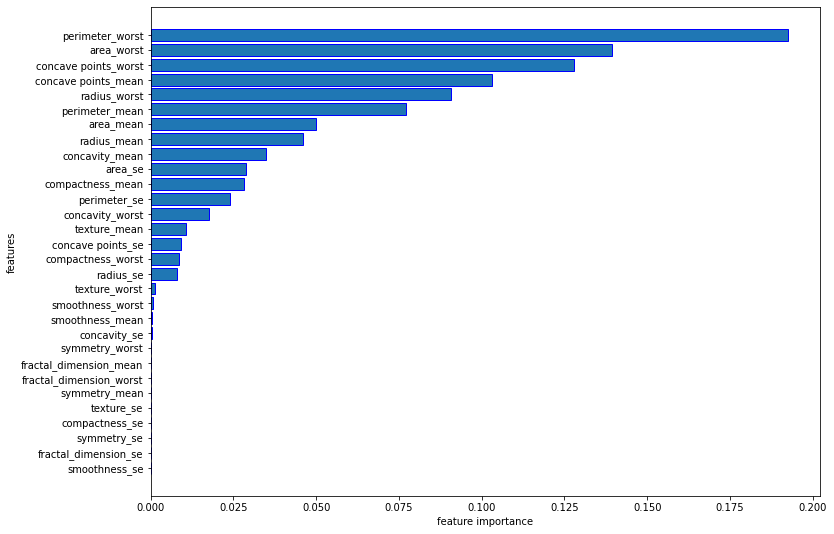

In [33]:
# make a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 9))
ax.barh(sorted_importance.labels, sorted_importance.value_fi, edgecolor='b')
ax.set(xlabel='feature importance', ylabel='features')
plt.show()